In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

In [3]:
!pip install backtesting ta
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from backtesting import Backtest, Strategy
from ta.trend import sma_indicator

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 175.5/175.5 kB 1.4 MB/s eta 0:00:00a 0:00:01
  Preparing metadata (setup.py) ... done
  Preparing metadata (setup.py) ... done
  Created wheel for backtesting: filename=Backtesting-0.3.3-py3-none-any.whl size=173916 sha256=e5ecb2d6139319c69ef1a49e1b315300f2cec6c347e74370b4bd28f5bc330b74
  Stored in directory: /root/.cache/pip/wheels/e2/30/7f/19cbe31987c6ebdb47f1f510343249066711609e3da2d57176
  Created wheel for ta: filename=ta-0.11.0-py3-none-any.whl size=29413 sha256=e052b0cd979b1b4ef9e42b44c86fd6d484a1d6ba285c97125b2e77d351ce24e6
  Stored in directory: /root/.cache/pip/wheels/5f/67/4f/8a9f252836e053e532c6587a3230bc72a4deb16b03a829610b
Successfully built backtesting ta


/opt/conda/lib/python3.10/site-packages/backtesting/_plotting.py:50: UserWarning: Jupyter Notebook detected. Setting Bokeh output to notebook. This may not work in Jupyter clients without JavaScript support (e.g. PyCharm, Spyder IDE). Reset with `backtesting.set_bokeh_output(notebook=False)`.
  warnings.warn('Jupyter Notebook detected. '


Loading BokehJS ...

[*********************100%%**********************]  1 of 1 completed


Mean Squared Error: 11.74915685979702


/tmp/ipykernel_35/3823515186.py:79: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df3['Predicted_Close'] = model.predict(df3[features])
/tmp/ipykernel_35/3823515186.py:83: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df3['SMA 10_ML'] = sma_indicator(close=df3['Predicted_Close'], window=10)
/tmp/ipykernel_35/3823515186.py:84: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentatio

,0
Start,2016-02-02 00:00:00
End,2020-12-18 00:00:00
Duration,1781 days 00:00:00
Exposure Time [%],95.454545
Equity Final [$],102419.393533
Equity Peak [$],114598.335758
Return [%],2.419394
Buy & Hold Return [%],126.379389
Return (Ann.) [%],9.557251
Volatility (Ann.) [%],87.832377


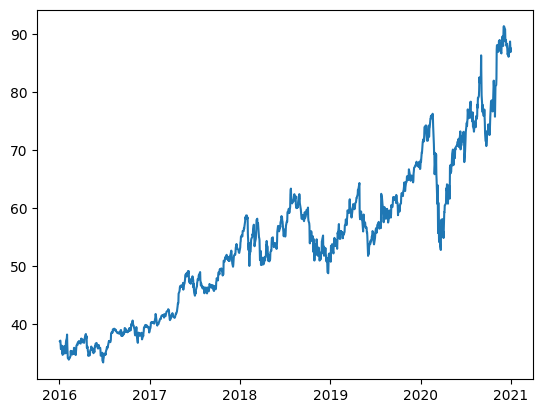

In [4]:
!pip install yfinance
import yfinance as yf
import pandas as pd

# Define the stock ticker symbol and the date range
ticker_symbol = 'GOOG'
start_date = '2016-01-01'
end_date = '2021-01-01'

# Download the data
df2 = yf.download(ticker_symbol, start=start_date, end=end_date)


# Display the first few rows of the data
df2.head()

df2.columns = ['Date', 'Open', 'High', 'Low', 'Close','Volume']
df3=df2
plt.plot(df2['Close'])
df2['SMA 10'] = sma_indicator(close=df2['Close'], window=10)
df2['SMA 20'] = sma_indicator(close=df2['Close'], window=20)
df2.loc[
    (df2['SMA 10'] > df2['SMA 20'])
    & (df2['SMA 10'].shift(1) <= df2['SMA 20'].shift(1)), 'position'] = 1
df2.loc[
    (df2['SMA 10'] < df2['SMA 20'])
    & (df2['SMA 10'].shift(1) >= df2['SMA 20'].shift(1)), 'position'] = -1

class GeneralStrategy(Strategy):
    def init(self):
        pass
    def next(self):
        if self.data.position == 1:
            self.buy()
        elif self.data.position == -1:
            self.position.close()
            
bt = Backtest(
    df2,
    GeneralStrategy,
    cash=100000,
    commission=0.002,
    trade_on_close=True,
    exclusive_orders=True)
stats = bt.run()
stats.to_frame()
# Create features
df3['Returns'] = df3['Close'].pct_change()

# Drop NaN values
df3 = df3.dropna()

# Display the first few rows with features
df3.head()
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

# Define the features and target
# features = ['SMA 10', 'SMA 20', 'Volume', 'Returns']
# features = ['SMA 10', 'SMA 20']
features = ['Open', 'High', 'Volume', 'Low','Returns']
target = 'Close'

# Split the data into training and testing sets
X = df3[features]
y = df3[target]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize and train the model
model = RandomForestRegressor(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

# Predict and evaluate the model
y_pred = model.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
print(f'Mean Squared Error: {mse}')
# Backtesting
df3['Predicted_Close'] = model.predict(df3[features])
df3.head()


df3['SMA 10_ML'] = sma_indicator(close=df3['Predicted_Close'], window=10)
df3['SMA 20_ML'] = sma_indicator(close=df3['Predicted_Close'], window=20)
df3.loc[
    (df3['SMA 10_ML'] > df3['SMA 20_ML'])
    & (df3['SMA 10_ML'].shift(1) <= df3['SMA 20_ML'].shift(1)), 'position_ML'] = 1
df3.loc[
    (df3['SMA 10_ML'] < df3['SMA 20_ML'])
    & (df3['SMA 10_ML'].shift(1) >= df3['SMA 20_ML'].shift(1)), 'position_ML'] = -1
df3.head(20)
bt = Backtest(
    df3,
    GeneralStrategy,
    cash=100000,
    commission=0.002,
    trade_on_close=True,
    exclusive_orders=True)
stats = bt.run()
stats.to_frame()